In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#linear algebra,data preprocessing,Csv files
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn import preprocessing
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#for data cleaning
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

#for feature selection
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#evalution metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#for classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

#model selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


#for clustering 
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [ ]:
with open('News_Category_Dataset_v2.json') as f:
  df = pd.DataFrame([json.loads(l) for l in f.readlines()])
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [ ]:
df.shape

(200853, 6)

In [ ]:
df.date = pd.to_datetime(df.date)
df["year"]= df.date.dt.year
df['year'].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012])

In [ ]:
df

,category,headline,authors,link,short_description,date,year
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,2018
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,2018
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,2018
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,2018
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,2018
...,...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,2012
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28,2012
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28,2012
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28,2012


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


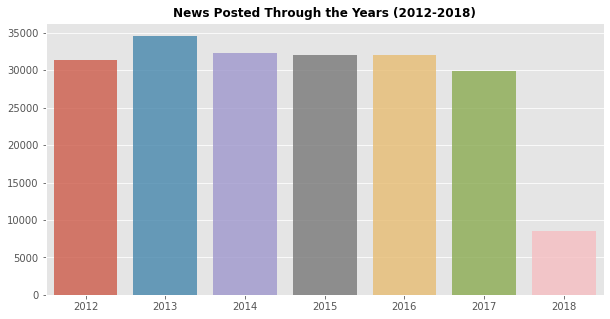

In [ ]:

plt.style.use('ggplot')
year  = df['year'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(year.index, year.values, alpha=0.8)
plt.title("News Posted Through the Years (2012-2018)",
          fontweight="bold", size=12);

# Word cloud 

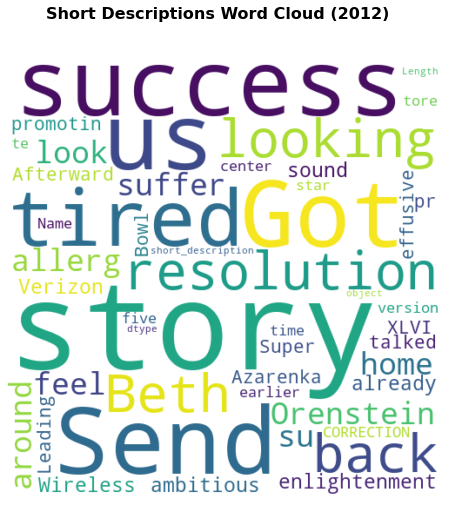

In [ ]:
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      width=500,
                      height=500
)
wordcloud.generate(str(df.query('year == 2012')['short_description']))
plt.rcParams['figure.figsize'] = (8,8)
plt.axis('off')
plt.suptitle('Short Descriptions Word Cloud (2012)', fontsize=16, fontweight='bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

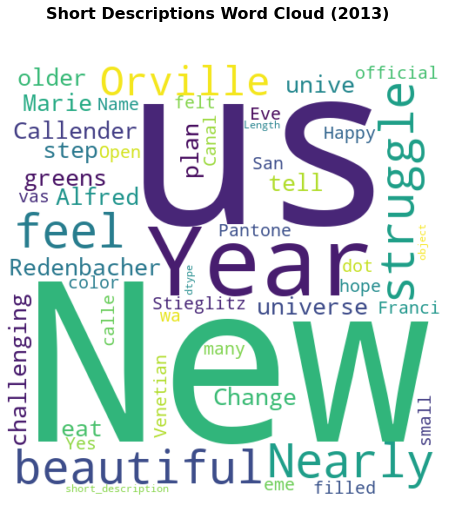

In [ ]:
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      width=500,
                      height=500
)
wordcloud.generate(str(df.query('year == 2013')['short_description']))
plt.rcParams['figure.figsize'] = (8,8)
plt.axis('off')
plt.suptitle('Short Descriptions Word Cloud (2013)', fontsize=16, fontweight='bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

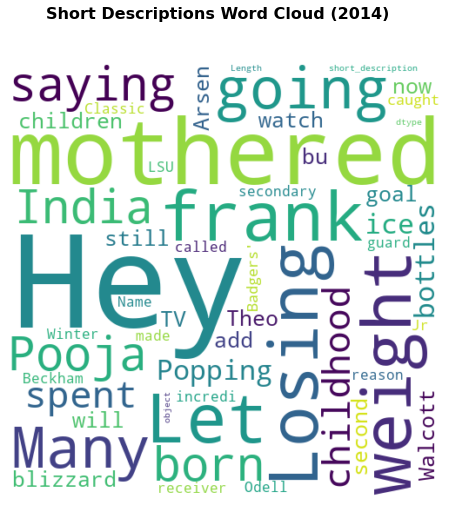

In [ ]:
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      width=500,
                      height=500
)
wordcloud.generate(str(df.query('year == 2014')['short_description']))
plt.rcParams['figure.figsize'] = (8,8)
plt.axis('off')
plt.suptitle('Short Descriptions Word Cloud (2014)', fontsize=16, fontweight='bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

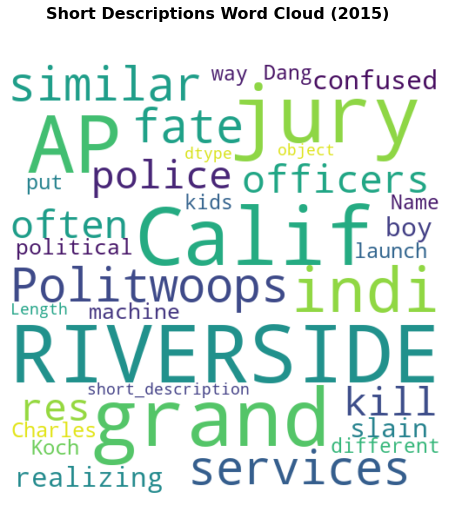

In [ ]:
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      width=500,
                      height=500
)
wordcloud.generate(str(df.query('year == 2015')['short_description']))
plt.rcParams['figure.figsize'] = (8,8)
plt.axis('off')
plt.suptitle('Short Descriptions Word Cloud (2015)', fontsize=16, fontweight='bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

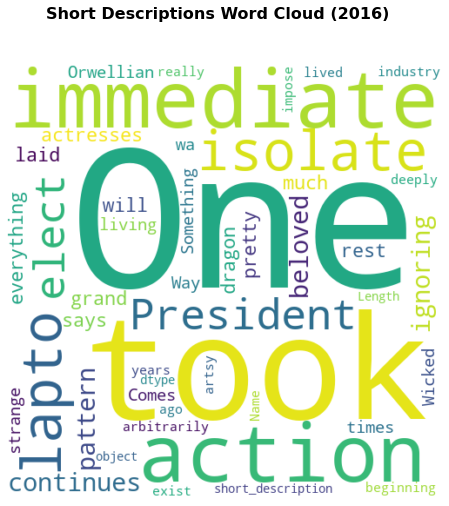

In [ ]:
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      width=500,
                      height=500
)
wordcloud.generate(str(df.query('year == 2016')['short_description']))
plt.rcParams['figure.figsize'] = (8,8)
plt.axis('off')
plt.suptitle('Short Descriptions Word Cloud (2016)', fontsize=16, fontweight='bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

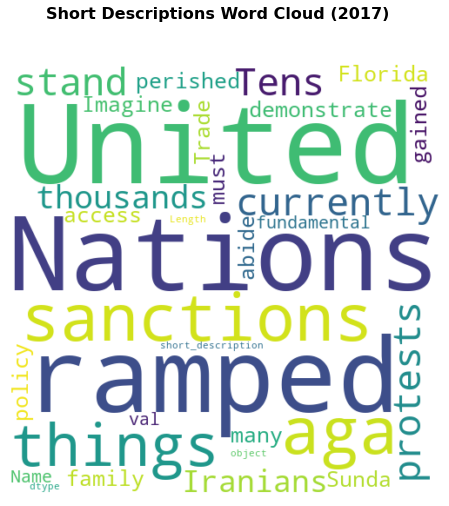

In [ ]:
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      width=500,
                      height=500
)
wordcloud.generate(str(df.query('year == 2017')['short_description']))
plt.rcParams['figure.figsize'] = (8,8)
plt.axis('off')
plt.suptitle('Short Descriptions Word Cloud (2017)', fontsize=16, fontweight='bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

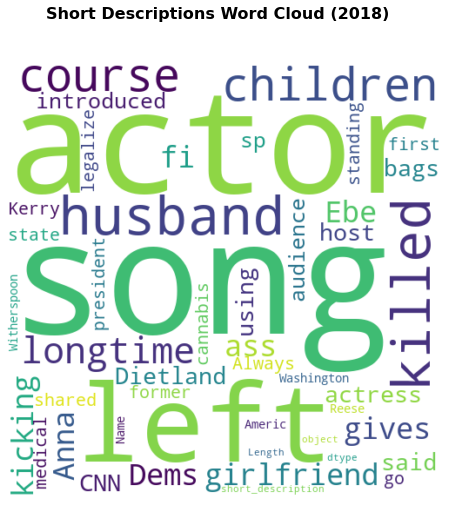

In [ ]:
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      width=500,
                      height=500
)
wordcloud.generate(str(df.query('year == 2018')['short_description']))
plt.rcParams['figure.figsize'] = (8,8)
plt.axis('off')
plt.suptitle('Short Descriptions Word Cloud (2018)', fontsize=16, fontweight='bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
df.drop(['authors', 'link', 'date'], axis = 1, inplace = True) 
df.head()

,category,headline,short_description,year
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,2018
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,2018
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,2018
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,2018
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",2018


In [ ]:
df.describe()

,year
count,200853.000000
mean,2014.611930
std,1.801049
min,2012.000000
25%,2013.000000
50%,2015.000000
75%,2016.000000
max,2018.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           200853 non-null  object
 1   headline           200853 non-null  object
 2   short_description  200853 non-null  object
 3   year               200853 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 6.1+ MB


# Checking duplicate values

In [ ]:
df.duplicated().sum()

439

In [ ]:
df.drop_duplicates(keep='last', inplace=True) 

In [ ]:
df.duplicated(subset=['short_description','headline']).sum()

49

In [ ]:
df.drop_duplicates(subset=['short_description','headline'],keep='last',inplace=True)

# Checking empty values

In [ ]:
len(df[df['headline'] == ""])

2

In [ ]:
df.loc[df['headline'] == "", 'headline'] = np.nan
df.dropna(subset=['headline'], inplace=True)
len(df[df['headline'] == ""])

0

In [ ]:
len(df[df['short_description'] == ""])

19610

In [ ]:
df.loc[df['short_description'] == "", 'short_description'] = np.nan
df.dropna(subset=['short_description'], inplace=True)
len(df[df['short_description'] == ""])

0

In [ ]:
df['description'] = df['headline'].astype(str)+" "+df['short_description']
df.drop(columns =['headline','short_description'],axis = 1, inplace=True)
df.astype(str)
df.head()

,category,year,description
0,CRIME,2018,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,2018,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,2018,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,2018,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,2018,Julianna Margulies Uses Donald Trump Poop Bags...


In [ ]:
df.isnull().sum()

category       0
year           0
description    0
dtype: int64

In [ ]:
df.duplicated(subset=['description']).sum()

0

# Label encoder to convert categorical column to numeric column

In [ ]:
df['category'].nunique()

41

In [ ]:
df['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1800x1080 with 0 Axes>

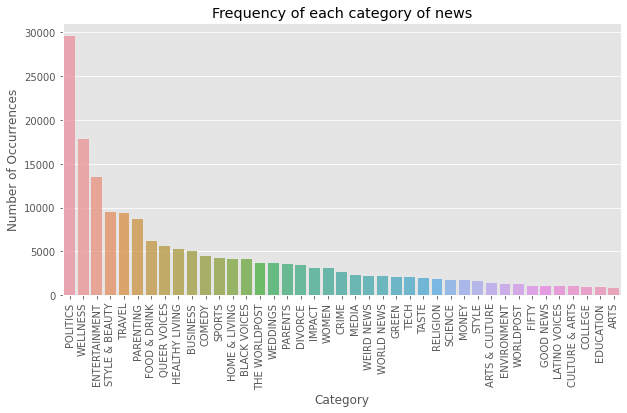

In [ ]:
plt.figure(figsize=(25, 15))
plt.style.use('ggplot')
category  = df['category'].value_counts()
plt.figure(figsize=(10,5))
g=sns.barplot(category.index, category.values, alpha=0.8)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Frequency of each category of news')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

# As we can see that there are many category name which are interlinked so its better to combine them

In [ ]:
categories = df['category'].value_counts().index

def groupper(grouplist,name):
    for ele in categories:
        if ele in grouplist:
            df.loc[df['category'] == ele, 'category'] = name

In [ ]:
groupper( grouplist= ['WELLNESS', 'HEALTHY LIVING','HOME & LIVING','STYLE & BEAUTY' ,'STYLE'] , name =  'LIFESTYLE AND WELLNESS')

groupper( grouplist= [ 'PARENTING', 'PARENTS' ,'EDUCATION' ,'COLLEGE'] , name =  'PARENTING AND EDUCATION')

groupper( grouplist= ['SPORTS','ENTERTAINMENT' , 'COMEDY','WEIRD NEWS','ARTS'] , name =  'SPORTS AND ENTERTAINMENT')

groupper( grouplist= ['TRAVEL', 'ARTS & CULTURE','CULTURE & ARTS','FOOD & DRINK', 'TASTE'] , name =  'TRAVEL-TOURISM & ART-CULTURE')

groupper( grouplist= ['WOMEN','QUEER VOICES', 'LATINO VOICES', 'BLACK VOICES'] , name =  'EMPOWERED VOICES')

groupper( grouplist= ['BUSINESS' ,  'MONEY'] , name =  'BUSINESS-MONEY')

groupper( grouplist= ['THE WORLDPOST' , 'WORLDPOST' , 'WORLD NEWS'] , name =  'WORLDNEWS')

groupper( grouplist= ['ENVIRONMENT' ,'GREEN'] , name =  'ENVIRONMENT')

groupper( grouplist= ['TECH', 'SCIENCE'] , name =  'SCIENCE AND TECH')

groupper( grouplist= ['FIFTY' , 'IMPACT' ,'GOOD NEWS','CRIME'] , name =  'GENERAL')

groupper( grouplist= ['WEDDINGS', 'DIVORCE',  'RELIGION','MEDIA'] , name =  'MISC')

In [ ]:
df['category'].nunique()

12

In [ ]:
df['category'].unique()

array(['GENERAL', 'SPORTS AND ENTERTAINMENT', 'WORLDNEWS', 'POLITICS',
       'EMPOWERED VOICES', 'BUSINESS-MONEY',
       'TRAVEL-TOURISM & ART-CULTURE', 'MISC', 'SCIENCE AND TECH',
       'PARENTING AND EDUCATION', 'LIFESTYLE AND WELLNESS', 'ENVIRONMENT'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1800x1080 with 0 Axes>

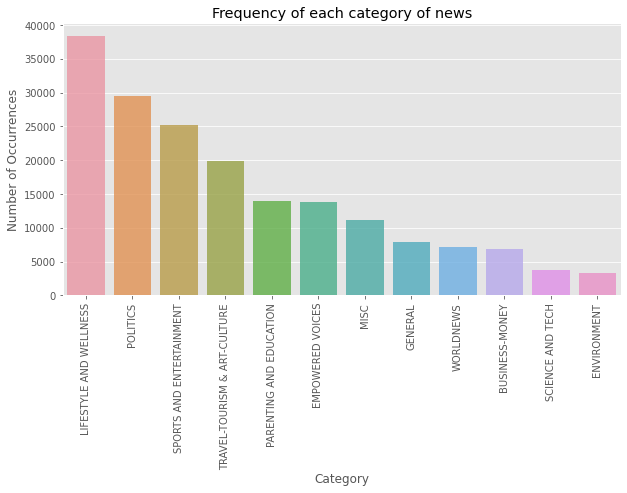

In [ ]:
plt.figure(figsize=(25, 15))
plt.style.use('ggplot')
category  = df['category'].value_counts()
plt.figure(figsize=(10,5))
g=sns.barplot(category.index, category.values, alpha=0.8)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Frequency of each category of news')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['category']= label_encoder.fit_transform(df['category'])
df

,category,year,description
0,3,2018,There Were 2 Mass Shootings In Texas Last Week...
1,9,2018,Will Smith Joins Diplo And Nicky Jam For The 2...
2,9,2018,Hugh Grant Marries For The First Time At Age 5...
3,9,2018,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,9,2018,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...,...
200848,8,2012,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
200849,9,2012,Maria Sharapova Stunned By Victoria Azarenka I...
200850,9,2012,"Giants Over Patriots, Jets Over Colts Among M..."
200851,9,2012,Aldon Smith Arrested: 49ers Linebacker Busted ...


# Data Cleaning

In [ ]:
#removing punctuations


def remove_punc(description):
    description = re.sub('\[.*?\]', '', description)
    description = re.sub('https?://\S+|www\.\S+', '', description)
    description = re.sub('<.*?>+', '', description)
    description = re.sub('[%s]' % re.escape(string.punctuation), '', description)
    description = re.sub('\n', '', description)
    description = re.sub('\w*\d\w*', '', description)
    return description
df['description'] = df['description'].apply(lambda x: remove_punc(x))

In [ ]:
#normalizing case

def normalize(description):        
    lower_case = description.lower()
    tokens=word_tokenize(lower_case)
    return (" ".join(tokens)).strip()

df['description'] = df['description'].apply(lambda x: normalize(x))

In [ ]:
#removing stop words

nltk_stop_words = nltk.corpus.stopwords.words('english')
def remove_stop(description):        
    word_list=[word for word in description.split() if word not in nltk_stop_words]
    return " ".join(word_list)

df['description'] = df['description'].apply(lambda x: remove_stop(x))

In [ ]:
#lemmatizing 

lemmatizer = WordNetLemmatizer()
def lemma(text): 
    lemmas = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(lemmas)
df['description'] = df['description'].apply(lambda x: lemma(x))

# New Section

In [ ]:
train, test = train_test_split(df, test_size=0.2)

# Feature Extraction

In [ ]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train.description)
X_train_counts.shape

(144602, 85391)

In [ ]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(144602, 85391)

Running Machine Learning Algorithm

Multinomial Naives Bayes

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                    ('clf', MultinomialNB()),])

text_clf = text_clf.fit(train.description, train.category)
predicted_mnb = text_clf.predict(test.description)

In [ ]:
classification_report(test.category,predicted_mnb)

'              precision    recall  f1-score   support\n\n           0       0.78      0.02      0.05      1304\n           1       0.88      0.15      0.26      2821\n           2       1.00      0.00      0.01       640\n           3       0.77      0.02      0.04      1584\n           4       0.45      0.95      0.61      7676\n           5       0.92      0.15      0.26      2219\n           6       0.77      0.16      0.26      2712\n           7       0.53      0.93      0.68      5947\n           8       1.00      0.01      0.02       752\n           9       0.63      0.67      0.65      5014\n          10       0.82      0.56      0.67      4017\n          11       0.97      0.12      0.22      1465\n\n    accuracy                           0.55     36151\n   macro avg       0.79      0.31      0.31     36151\nweighted avg       0.68      0.55      0.47     36151\n'

In [ ]:
confusion_matrix(test.category,predicted_mnb)

array([[  31,    1,    0,    0,  746,    1,    7,  457,    0,   32,   29,
           0],
       [   0,  421,    0,    3,  879,   10,   22,  851,    0,  604,   31,
           0],
       [   0,    0,    2,    0,  286,    0,    2,  252,    0,   47,   51,
           0],
       [   0,    8,    0,   34,  762,    1,   24,  525,    0,  190,   37,
           3],
       [   0,    0,    0,    0, 7266,    4,   12,  156,    0,  146,   92,
           0],
       [   0,    8,    0,    0, 1074,  343,   26,  507,    0,  225,   35,
           1],
       [   0,   10,    0,    0, 1777,    0,  433,  240,    0,  218,   34,
           0],
       [   2,    4,    0,    1,  280,    1,    3, 5504,    0,  127,   24,
           1],
       [   6,    0,    0,    0,  454,    0,    6,  160,    9,   90,   27,
           0],
       [   0,   16,    0,    0, 1035,    6,   17,  500,    0, 3364,   76,
           0],
       [   1,    5,    0,    0, 1322,    3,    5,  154,    0,  272, 2254,
           1],
       [   0,    7,  

SVM Algorithm

In [ ]:
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                     ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',n_jobs=-1,
                                           alpha=1e-3))])

text_clf_svm = text_clf_svm.fit(train.description, train.category)
predicted_svm = text_clf_svm.predict(test.description)


In [ ]:
classification_report(test.category,predicted_svm)

'              precision    recall  f1-score   support\n\n           0       0.61      0.28      0.39      1304\n           1       0.74      0.34      0.47      2821\n           2       0.55      0.18      0.27       640\n           3       0.61      0.12      0.20      1584\n           4       0.62      0.88      0.72      7676\n           5       0.75      0.54      0.63      2219\n           6       0.60      0.64      0.62      2712\n           7       0.60      0.89      0.72      5947\n           8       0.72      0.22      0.34       752\n           9       0.67      0.57      0.62      5014\n          10       0.71      0.71      0.71      4017\n          11       0.71      0.43      0.54      1465\n\n    accuracy                           0.64     36151\n   macro avg       0.66      0.48      0.52     36151\nweighted avg       0.65      0.64      0.61     36151\n'

In [ ]:
confusion_matrix(test.category,predicted_svm)

array([[ 367,   19,    4,    6,  386,   15,   53,  297,   10,   43,   89,
          15],
       [  14,  965,    2,   18,  465,   81,  174,  575,    2,  438,   70,
          17],
       [  10,    7,  113,    5,  153,    9,   30,  171,   12,   39,   77,
          14],
       [  40,   56,   20,  194,  430,   35,  218,  275,    3,  138,  127,
          48],
       [  25,   26,    3,   17, 6722,   62,  177,  205,   10,  175,  243,
          11],
       [  15,   35,    5,    3,  314, 1195,  109,  343,    5,  109,   51,
          35],
       [  25,   21,    1,   12,  533,   19, 1749,  160,    2,  109,   80,
           1],
       [  29,   68,   12,   20,  198,   28,   72, 5313,    3,   68,   60,
          76],
       [  32,    4,   13,    3,  255,   15,   32,  103,  166,   67,   50,
          12],
       [  17,   61,   15,   29,  651,   82,  196,  804,   10, 2874,  257,
          18],
       [  15,   27,    4,    4,  671,   24,   79,  147,    4,  191, 2834,
          17],
       [   9,   19,  

Grid SearchCV (I tuned svm coz it gave better accuracy then multinomial naive bayes)

In [ ]:
parameters = {'vect__ngram_range': [(1, 2)],
              'tfidf__use_idf': (True, False),
               'clf-svm__loss': ['log'],
                'clf-svm__penalty': ['elasticnet'],
                'clf-svm__alpha': [10 ** x for x in range(-6, -5)],
                'clf-svm__l1_ratio': [0, 0.05],
 }

gs_clf = GridSearchCV(text_clf_svm, parameters, refit = True, verbose = 3)
gs_clf = gs_clf.fit(train.description, train.category)
predicted_gs = gs_clf.predict(test.description)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] clf-svm__alpha=1e-06, clf-svm__l1_ratio=0, clf-svm__loss=log, clf-svm__penalty=elasticnet, tfidf__use_idf=True, vect__ngram_range=(1, 2) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf-svm__alpha=1e-06, clf-svm__l1_ratio=0, clf-svm__loss=log, clf-svm__penalty=elasticnet, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.724, total=  35.0s
[CV] clf-svm__alpha=1e-06, clf-svm__l1_ratio=0, clf-svm__loss=log, clf-svm__penalty=elasticnet, tfidf__use_idf=True, vect__ngram_range=(1, 2) 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.0s remaining:    0.0s


[CV]  clf-svm__alpha=1e-06, clf-svm__l1_ratio=0, clf-svm__loss=log, clf-svm__penalty=elasticnet, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.717, total=  34.6s
[CV] clf-svm__alpha=1e-06, clf-svm__l1_ratio=0, clf-svm__loss=log, clf-svm__penalty=elasticnet, tfidf__use_idf=True, vect__ngram_range=(1, 2) 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV]  clf-svm__alpha=1e-06, clf-svm__l1_ratio=0, clf-svm__loss=log, clf-svm__penalty=elasticnet, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.712, total=  33.4s
[CV] clf-svm__alpha=1e-06, clf-svm__l1_ratio=0, clf-svm__loss=log, clf-svm__penalty=elasticnet, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-svm__alpha=1e-06, clf-svm__l1_ratio=0, clf-svm__loss=log, clf-svm__penalty=elasticnet, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.713, total=  33.0s
[CV] clf-svm__alpha=1e-06, clf-svm__l1_ratio=0, clf-svm__loss=log, clf-svm__penalty=elasticnet, tfidf__use_idf=True, vect__ngram_range=(1, 2) 
[CV]  clf-svm__alpha=1e-06, clf-svm__l1_ratio=0, clf-svm__loss=log, clf-svm__penalty=elasticnet, tfidf__use_idf=True, vect__ngram_range=(1, 2), score=0.714, total=  37.9s
[CV] clf-svm__alpha=1e-06, clf-svm__l1_ratio=0, clf-svm__loss=log, clf-svm__penalty=elasticnet, tfidf__use_idf=False, vect__ngram_range=(1, 2) 
[CV]  clf-svm__alpha=1e-06, clf-svm__l1_ratio=0, clf-svm_

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 11.7min finished


In [ ]:
gs_clf.best_estimator_

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 SGDClassifier(alpha=1e-06, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.05,
                               learning_rate='optimal', loss='log',
                               max_iter=1000, n_

In [ ]:
classification_report(test.category,predicted_gs)

'              precision    recall  f1-score   support\n\n           0       0.60      0.54      0.57      1304\n           1       0.67      0.53      0.59      2821\n           2       0.58      0.50      0.54       640\n           3       0.54      0.35      0.42      1584\n           4       0.73      0.87      0.79      7676\n           5       0.77      0.65      0.70      2219\n           6       0.66      0.71      0.68      2712\n           7       0.77      0.83      0.80      5947\n           8       0.66      0.43      0.52       752\n           9       0.72      0.73      0.72      5014\n          10       0.77      0.77      0.77      4017\n          11       0.73      0.66      0.69      1465\n\n    accuracy                           0.72     36151\n   macro avg       0.68      0.63      0.65     36151\nweighted avg       0.71      0.72      0.71     36151\n'

In [ ]:
confusion_matrix(test.category,predicted_gs)

array([[ 703,   30,   16,   37,  212,   17,   45,  113,   24,   36,   55,
          16],
       [  33, 1492,    2,   74,  264,   81,  142,  282,    7,  368,   55,
          21],
       [  15,    8,  320,   25,   69,    4,   21,   71,   16,   33,   44,
          14],
       [  55,   86,   38,  555,  295,   26,  162,  115,    9,  118,   75,
          50],
       [  71,   59,   15,   50, 6645,   70,  187,   97,   32,  200,  239,
          11],
       [  22,   68,    7,   20,  198, 1447,   79,  187,   10,  105,   40,
          36],
       [  48,   56,    7,   30,  356,   31, 1913,   80,    9,  114,   65,
           3],
       [  93,  146,   52,   82,  127,   80,   95, 4937,   14,  129,   53,
         139],
       [  58,   17,   28,    7,  136,   16,   25,   34,  323,   65,   30,
          13],
       [  25,  187,   26,   89,  325,   66,  144,  262,   20, 3640,  201,
          29],
       [  30,   51,   18,   16,  380,   22,   71,   66,   15,  236, 3077,
          35],
       [  23,   30,  

K-mean ckustering

# Finding Optimal Clusters

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


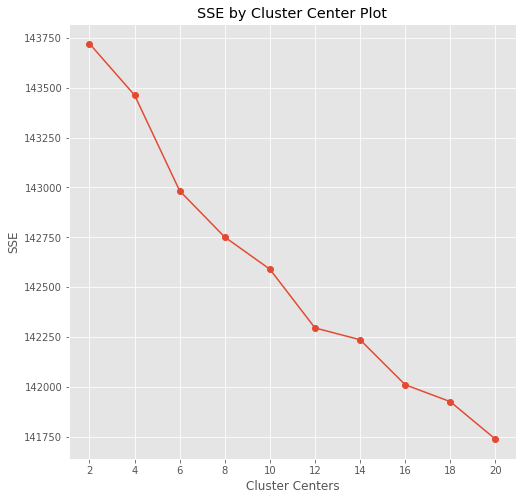

In [ ]:

def find_optimal_clusters(df, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(df).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X_train_tfidf, 20)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(X_train_tfidf)

# Plotting Clusters

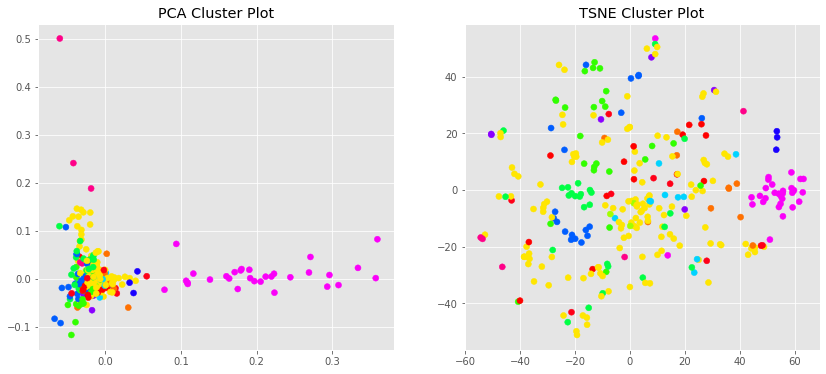

In [ ]:

def plot_tsne_pca(df, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(df.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(df[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(df[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(X_train_tfidf, clusters)